# Homework #4: Basic Stats and Probability

## Question 2 Testing against Benford's Law

__Instructions:__
* For __(A)__ modify the function benford() 
* For __(B)__ write code to analyze `election-iran-2009.csv`
* Run all cells to show the output

In [1]:
!pip3 install scipy
!pip install scipy

/bin/sh: 1: pip3: not found
  Using cached scipy-1.0.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached numpy-1.14.0-cp27-cp27mu-manylinux1_x86_64.whl
You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import csv
import collections
import matplotlib.pyplot as plt
import pylab
import numpy
from scipy import stats
from math import log10

__(A)__ In the `benford/` subdirectory, there is a .csv file called `SUB-EST2009_ALL.csv` which is the population numbers from the US census. Below is a trunk of Python code that parses the pupulation data, plots the distribution of their first digits side-by-side with the "theoretical" distribution, and performs hypothesis testing (using a [$\chi^2$ test](http://en.wikipedia.org/wiki/Chi-squared_test)) to know how well the observed first-digit frequencies conform to the theoretical distribution.  

But the p-value computed by the supplied code is WRONG! The theoretical distribution in this case should be governed by Benford's Law, but the current implementation in the `benford()` function below uses the uniform distribution.  Your task is to **modify the `benford()` function** so it reflects Benford's Law instead. **Run your modified code and report the p-value. Is it close to 1 or 0? What does that tell you?**

In [3]:
def benford():
    #
    # This method returns an array of 9 entries, representing
    # the probabilities of having the first digit to be 1, 2, ..., 9.
    #
  # WARNING: The following just represent uniform distribution; please repalce
    # it with your own implementation of Benford!
    #
    return [ log10(d+1)-log10(d) for d in digits ]

chi-squared test p-value: 2.2747922135321912e-05


Text(0.5,1,u'chi-squared test p-value: 2.2747922135321912e-05')

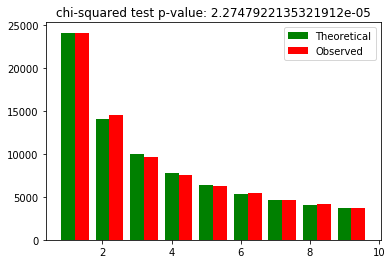

In [4]:
digits = range(1, 10) # for first-digit distro, we don't consider 0

with open('SUB-EST2009_ALL.csv') as csvfile:
    numbers = (int(row['POPCENSUS_2000']) \
               for row in csv.DictReader(csvfile) \
               if row['POPCENSUS_2000'].isdigit())
    firstdigits = (int(str(x)[0]) for x in numbers)
    counts = collections.Counter(firstdigits)

# Peform chi-squared test:
freqs = [counts[d] for d in digits]
total = sum(counts[d] for d in digits)
theoretical_freqs = [ f * total for f in benford() ]
chisq, pvalue = stats.chisquare(freqs, theoretical_freqs)
print('chi-squared test p-value: ' + str(pvalue))

# Plot two distros side-by-side:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# The third parameter below is the width of the bar, set
# such that we can squeeze another set of bars in:
rects1 = ax.bar(digits, theoretical_freqs, 0.4, color='g')
# In the following, adding the bar width to the x coordinates
# position this set of bars side-by-side with the last:
rects2 = ax.bar([d + 0.4 for d in digits], freqs, 0.4, color='r')
ax.legend((rects1[0], rects2[0]), ('Theoretical', 'Observed'))
ax.set_title('chi-squared test p-value: ' + str(pvalue))

Run your modified code and report the p-value. Is it close to 1 or 0? What does that tell you?

The p-value that is produced is very close to 0, but the histograms are similar. Looking at the y-axis, the scale is very large, which means the visual similarity is in fact probably a significant difference. This signifies that the population data is by chance very similar to a distribution that is close to Benford. 

__(B)__ Next, you are going to **modify the code further to analyze data from the 2009 Iranian election** in `election-iran-2009.csv`. The numbers of interest in the `.csv` file are the vote counts for candidates Ahmadinejad, Rezai, Karrubi, and Mousavi.  Note that these numbers have commas in them.  You might find Python's [`csv.DictReader`](https://docs.python.org/2/library/csv.html#csv.DictReader) useful.

Consider the first-digit distribution of all candidates' vote counts, as well as that of each candidate's vote counts.  Compare each of these distributions to Benford Law. **Which distribution gives you the lowest p-value? How does it compare with the magic p-value of 0.05, which people often use to "reject" the hypothesis that data follows the theoretical distribution?**

chi-squared test p-value: 0.7090550582450321


Text(0.5,1,u'chi-squared test p-value: 0.7090550582450321')

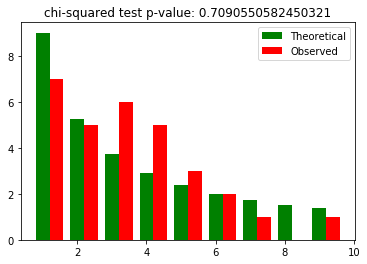

In [9]:
digits = range(1, 10) # for first-digit distro, we don't consider 0

with open('election-iran-2009.csv') as csvfile:
    #names = ['Ahmadinejad', 'Rezai', 'Karrubi','Mousavi']
 
    numbers = (int((row['Ahmadinejad']).replace(",", "")) \
               for row in csv.DictReader(csvfile)) 
    firstdigits = (int(str(x)[0]) for x in numbers)
    counts = collections.Counter(firstdigits)

# Peform chi-squared test:
freqs = [counts[d] for d in digits]
total = sum(counts[d] for d in digits)
theoretical_freqs = [ f * total for f in benford() ]
chisq, pvalue = stats.chisquare(freqs, theoretical_freqs)
print('chi-squared test p-value: ' + str(pvalue))

# Plot two distros side-by-side:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# The third parameter below is the width of the bar, set
# such that we can squeeze another set of bars in:
rects1 = ax.bar(digits, theoretical_freqs, 0.4, color='g')
# In the following, adding the bar width to the x coordinates
# position this set of bars side-by-side with the last:
rects2 = ax.bar([d + 0.4 for d in digits], freqs, 0.4, color='r')
ax.legend((rects1[0], rects2[0]), ('Theoretical', 'Observed'))
ax.set_title('chi-squared test p-value: ' + str(pvalue))

chi-squared test p-value: 0.11813362307099959


Text(0.5,1,u'chi-squared test p-value: 0.11813362307099959')

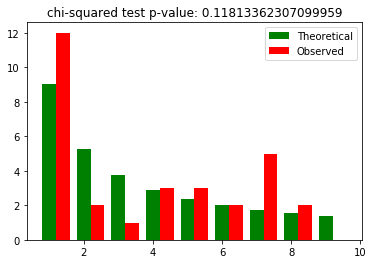

In [10]:
digits = range(1, 10) # for first-digit distro, we don't consider 0

with open('election-iran-2009.csv') as csvfile:
    #names = ['Ahmadinejad', 'Rezai', 'Karrubi','Mousavi']
 
    numbers = (int((row['Rezai']).replace(",", "")) \
               for row in csv.DictReader(csvfile)) 
    firstdigits = (int(str(x)[0]) for x in numbers)
    counts = collections.Counter(firstdigits)

# Peform chi-squared test:
freqs = [counts[d] for d in digits]
total = sum(counts[d] for d in digits)
theoretical_freqs = [ f * total for f in benford() ]
chisq, pvalue = stats.chisquare(freqs, theoretical_freqs)
print('chi-squared test p-value: ' + str(pvalue))

# Plot two distros side-by-side:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# The third parameter below is the width of the bar, set
# such that we can squeeze another set of bars in:
rects1 = ax.bar(digits, theoretical_freqs, 0.4, color='g')
# In the following, adding the bar width to the x coordinates
# position this set of bars side-by-side with the last:
rects2 = ax.bar([d + 0.4 for d in digits], freqs, 0.4, color='r')
ax.legend((rects1[0], rects2[0]), ('Theoretical', 'Observed'))
ax.set_title('chi-squared test p-value: ' + str(pvalue))

chi-squared test p-value: 0.35300574369451


Text(0.5,1,u'chi-squared test p-value: 0.35300574369451')

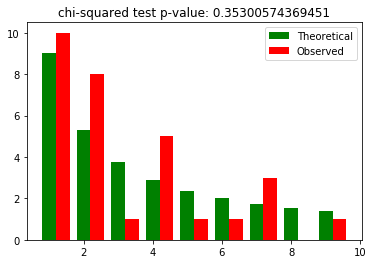

In [11]:
digits = range(1, 10) # for first-digit distro, we don't consider 0

with open('election-iran-2009.csv') as csvfile:
    #names = ['Ahmadinejad', 'Rezai', 'Karrubi','Mousavi']
 
    numbers = (int((row['Karrubi']).replace(",", "")) \
               for row in csv.DictReader(csvfile)) 
    firstdigits = (int(str(x)[0]) for x in numbers)
    counts = collections.Counter(firstdigits)

# Peform chi-squared test:
freqs = [counts[d] for d in digits]
total = sum(counts[d] for d in digits)
theoretical_freqs = [ f * total for f in benford() ]
chisq, pvalue = stats.chisquare(freqs, theoretical_freqs)
print('chi-squared test p-value: ' + str(pvalue))

# Plot two distros side-by-side:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# The third parameter below is the width of the bar, set
# such that we can squeeze another set of bars in:
rects1 = ax.bar(digits, theoretical_freqs, 0.4, color='g')
# In the following, adding the bar width to the x coordinates
# position this set of bars side-by-side with the last:
rects2 = ax.bar([d + 0.4 for d in digits], freqs, 0.4, color='r')
ax.legend((rects1[0], rects2[0]), ('Theoretical', 'Observed'))
ax.set_title('chi-squared test p-value: ' + str(pvalue))

chi-squared test p-value: 0.6702036659602462


Text(0.5,1,u'chi-squared test p-value: 0.6702036659602462')

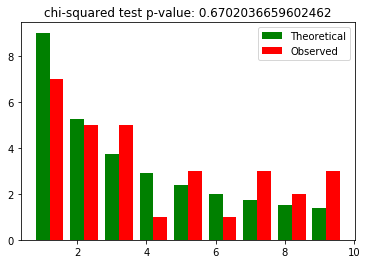

In [12]:
digits = range(1, 10) # for first-digit distro, we don't consider 0

with open('election-iran-2009.csv') as csvfile:
    #names = ['Ahmadinejad', 'Rezai', 'Karrubi','Mousavi']
 
    numbers = (int((row['Mousavi']).replace(",", "")) \
               for row in csv.DictReader(csvfile)) 
    firstdigits = (int(str(x)[0]) for x in numbers)
    counts = collections.Counter(firstdigits)

# Peform chi-squared test:
freqs = [counts[d] for d in digits]
total = sum(counts[d] for d in digits)
theoretical_freqs = [ f * total for f in benford() ]
chisq, pvalue = stats.chisquare(freqs, theoretical_freqs)
print('chi-squared test p-value: ' + str(pvalue))

# Plot two distros side-by-side:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# The third parameter below is the width of the bar, set
# such that we can squeeze another set of bars in:
rects1 = ax.bar(digits, theoretical_freqs, 0.4, color='g')
# In the following, adding the bar width to the x coordinates
# position this set of bars side-by-side with the last:
rects2 = ax.bar([d + 0.4 for d in digits], freqs, 0.4, color='r')
ax.legend((rects1[0], rects2[0]), ('Theoretical', 'Observed'))
ax.set_title('chi-squared test p-value: ' + str(pvalue))

Which distribution gives you the lowest p-value? How does it compare with the magic p-value of 0.05, which people often use to "reject" the hypothesis that data follows the theoretical distribution?

Rezai gives the lowest p-value, which means his data deviates most from Benford's Law. The p-value of 0.118 is still pretty high, so the null hypothesis cannot be rejected. This means that there could still be falsely reported data or errors. 
